## CPSC 483-01 Project 2
***
**Name:** Tianzheng Li <br><br>
*All 10 experiments are functional and completed*

# 1. Importing the .npz file
***
The .npz file will load as long as the files are in the same directory, which we will do so with numpy's `load()`.

In [20]:
import numpy as load
import numpy as np

# loads .npz file
data = np.load('boston.npz')

# 2. Splitting the validation and training data
***
The validation data will consist of the first 102 data points, while the remaining 404 will be in the training set. <br><br>
Additionally, the *target* and *features* data for each are split into their own lists.

In [21]:
# Split first 102 data into validation set
valid_set_MV = []
valid_set_RM = []
for i in range(0, 102):
    valid_set_MV.append(data['target'][i])
    valid_set_RM.append(data['features'][i][5])

# Split remaining data into training set
train_set_MV = []
train_set_RM = []
for i in range(102, 506):
    train_set_MV.append(data['target'][i - 102])
    train_set_RM.append(data['features'][i - 102][5])

# 3. Plotting the training data
***
The x-values for the plot will be the *number of rooms*, which is already stored in `train_set_RM`
and the y-values will be the *median value of the home*, which is stored in `train_set_MV`. <br><br>
The relationship between the x- and y- values seem fairly linear, with the exception of a few outliers.

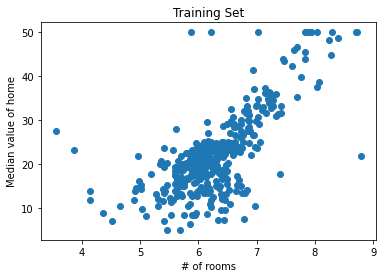

In [22]:
import matplotlib.pyplot as plt

# Scatterplot
plt.scatter(train_set_RM, train_set_MV)
plt.title("Training Set")
plt.xlabel("# of rooms")
plt.ylabel("Median value of home")
plt.show()

# 4. Computing *w* with np.linalg.inv()
***
Using numpy's `inv()` a linear regression line will be plotted onto the scatter plot to indicate best fit. <br>
**Edit:** I will instead use `pinv()` to account for cases of singular matrices, or if the determinant is 0.<br><br>
To do so, I will create a function `calc_w()`, which will return an array with *w0* and *w1*. <br><br>
`create_x_matrix` will be used to turn the dataset into a matrix. <br><br>
The linear equation that is created is `y = 8.98x + -34.17`

In [23]:
import numpy as np

# Calculates w0 and w1
def calc_w(x_data, y_data):
    w = np.dot(x_data.T, x_data)
    w = np.linalg.pinv(w)
    w = np.dot(w, x_data.T)
    w = np.dot(w, y_data)
    return w

# Converts list to a matrix
def create_x_matrix(x_data):
    x_list = []
    for i in range(0, len(x_data)):
        x_list.append([1, x_data[i]])
    x_list = np.array(x_list)
    return x_list

# Print equation
train_x = create_x_matrix(train_set_RM)
train_y = np.array(train_set_MV)
w = calc_w(train_x, train_y)
print("y = " + str(w[1]) + "x + " + str(w[0]))

y = 8.982632213161871x + -34.1693837168381


# 5. Adding least squares line to scatterplot
***
With the equation I got from experiment 4 and the scatterplot from experiment 3, when we combine them together we get the following. <br> <br>
The line fits the graph as well as I would have expected. I would expect the slope to be higher if some of the outliers were removed.

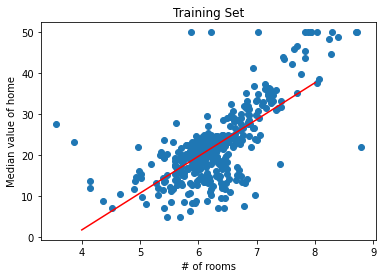

In [24]:
# Least squares line
x = np.array(range(4, 9))
y = w[1] * x + w[0]
plt.plot(x, y, color = 'red')

# Scatterplot
plt.scatter(train_set_RM, train_set_MV)
plt.title("Training Set")
plt.xlabel("# of rooms")
plt.ylabel("Median value of home")
plt.show()

# 6. Average loss
***
`MSE()` will be used find the average loss. <br><br>
`experiment()` will be used to call all the functions necessary for the experiment.<br><br>
The average loss found is `40.25` 

In [25]:
# Average loss
def MSE(x_data, y_data, w):
    xw = np.dot(x_data, w)
    l = np.subtract(y_data, xw)
    l = np.dot(l.T, l)
    return l / len(x_data)

# Executes the entire experiment
def experiment(x_data, y_data):
    length = len(x_data)
    x = create_x_matrix(x_data)
    y = np.array(y_data)
    w = calc_w(x, y)
    
    # generates predicted values based on w
    y_pred = []
    for i in range(0, length):
        y_pred.append(w[0] + (w[1] * x_data[i]))
    
    loss = MSE(x, y, w)
    print("\033[1mAverage loss: \033[0m" + str(loss))

# RM and MEDV training set
experiment(train_set_RM, train_set_MV)



Average loss: 40.250455631159


# 7. Validation set
***
After calling the `experiment()` function once again for the validation set I get `53.31`. <br><br>
The loss of the validation set is noticeably greater, `13.06` greater, than the training set's `40.25`, which would be due to the fact that that the validation set has far less data to work with.

In [26]:
# RM and MEDV validation set
experiment(valid_set_RM, valid_set_MV)

Average loss: 53.30625794995985


# 8. Remaining input features
***
Computing the MSEs for the training and validation sets for all features will require a new function `create_x_fmatrix()`, which is able to handle a list that is already 2-dimensional, which our previous function was unable to do. <br><br>
Afterwards the data is then split like they were previously and rather than using the `experiment()` function before, which does not work for an array with more than 2 columns, I just utilize the functions I had before manually. <br><br>
A key change I made was to experiment 4's `inv()`, which I had to switch to `pinv()` for cases where the determinant of the matrix is 0. <br><br>
The MSEs for the training and validation set is `19.73` and `20.21` respectively, which follows the same trend of the validation set being higher than the training's loss. The loss however is much lower, about half, than when experiment 6 and 7 where we only used the RM data for x. The difference may also be due to using more data to work with.

In [27]:
# Converts features list to a matrix
def create_x_fmatrix(x_data):
    x_list = []
    for i in range(0, len(x_data)):
        temp = []
        temp.append(1)
        for j in range(0, len(x_data[i])):
            temp.append(x_data[i][j])
        x_list.append(temp)
    x_list = np.array(x_list)
    return x_list

# Split first 102 data into validation set
valid_set_X = []
for i in range(0, 102):
    valid_set_X.append(data['features'][i])

# Split remaining data into training set
train_set_X = []
for i in range(102, 506):
    train_set_X.append(data['features'][i - 102])

# find w and MSE for training set
train_features = create_x_fmatrix(train_set_X)
train_f_w = calc_w(train_features, train_set_MV)
train_f_e = MSE(train_features, train_set_MV, train_f_w)
print("\033[1mAll training features MSE: \033[0m" + str(train_f_e))


# find w and MSE for validation set
valid_features = create_x_fmatrix(valid_set_X)
valid_f_w = calc_w(valid_features, valid_set_MV)
valid_f_e = MSE(valid_features, valid_set_MV, valid_f_w)
print("\033[1mAll validation features MSE: \033[0m" + str(valid_f_e))

All training features MSE: 19.726205827981367
All validation features MSE: 20.214148879815486


# 9. Features and increase of MV
***
If we were too look at the training set data's w vectos, ignoring the first value (w0), we can estimate that:<br>
1. As crime rate is increased by 1 unit, a house will **lose `$9.63`** of its value.
2. As the proportion of residential land is zoned by 1 unit (25,000 sq. ft.), a house will **increase `$4.43`** of its value.
3. As the proportion of non-retail business increaseby 1 unit (1 acre). a house will **lose `$1.09`** of its value.
4. As the Charles River dummy variable increases by 1 unit, a house will **increase `$2.22`** of its value.
5. As nitric oxide concentration increases by 1 unit (parts per 10 million), a house will **lose `$1.64`** of its value.
6. As average number of rooms increase by 1 unit, a house will **increase `$3.88`** of its value.
7. As the proportion of owner-occupied units built before 1940 increases by 1 unit, a house will **lose `$8.55`** of its value.
8. As the weighted distances to five Boston employment center increases by 1 unit, a house will **lose `$1.50`** of its value.
9. As the index of accessibility to radial highways increase by 1 unit, a house will **increase `$2.70`** of its value.
10. As the full-value property-tax rate increases by 1 unit (`$10,000`), a house will **lose `$1.18`** of its value.
11. As the pupil-teacher ratio increases by 1 unit, a house will **lose `$9.67`** of its value.
12. As the proportion of blacks increase by 1 unit (1000 (x - 0.63))^2, a house will **increase `$8.90`** of its value.
13. As the percentage of lower status increases by 1 unit, a house will **lose `$4.78`** of its value.

In [28]:
# Training set
print("\033[1mTraining w vectors (0-13)\033[0m")
print(train_f_w)
print()

# Validation set
print("\033[1mValidation w vectors (0-13)\033[0m")
print(valid_f_w)

Training w vectors (0-13)
[ 3.62360512e+01 -9.63256735e-02  4.43238214e-02 -1.08561098e-02
  2.21714010e+00 -1.64342821e+01  3.88459267e+00 -8.55222074e-03
 -1.50250434e+00  2.70398969e-01 -1.18358938e-02 -9.66930747e-01
  8.89555889e-03 -4.78195931e-01]

Validation w vectors (0-13)
[ 5.12811287e+01 -9.49848182e-02  4.76305111e-02 -3.63407030e-02
  3.42317937e+00 -1.96487888e+01  2.81393877e+00  7.15969218e-03
 -1.83114511e+00  2.50183749e-01 -1.21228727e-02 -1.15160786e+00
  7.73583791e-03 -6.62959844e-01]


# 10. Which features are most important?
***
For increasing value of homes the most influential factor is the proportion of the black population; the higher the greater the home values. <br><br>
For losing value of homes the most influential factor is the proportion of old homes; the older a home is (built before 1940) the lower the home values will plummet.